## Linear Regression Model for 2020 Dataset

In [19]:
#To Handle Dataset
import pandas as pd
import numpy as np
from collections import defaultdict

#To make plots and Visualize the Data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#TO Build a ML Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
#Read all the Excel Files which have Report Data from 2016 to 2020

##########     Reading the 2020 Report ##########################
df_2020=pd.read_csv('./2020.csv')

#There is no Happiness Rank in the Datset while Remaining Datasets Have. good part is data is ordered as per the Rank
df_2020['Happiness Rank'] =  range(1, len(df_2020.index)+1)

#Renaming the Columns so that all datasets have similar Header Names which will be Required later to Analyse Data from cumulative Years

df_2020 = df_2020.rename(columns = {'Country name' : 'Country', 'Ladder score' : 'Happiness Score', 
                        'Logged GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family', 
                                    'Healthy life expectancy' : 'Health (Life Expectancy)',
                        'Freedom to make life choices' : 'Freedom', 
                                    'Perceptions of corruption' : 'Trust (Government Corruption)'})

#Adding Year Column in order to differentiate data easily
df_2020['Year']=2020

##########     Reading the 2019 Report ##########################
df_2019 = pd.read_csv('./2019.csv')
df_2019['Year']=2019
df_2019 = df_2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom'
                                     , 'Perceptions of corruption' : 'Trust (Government Corruption)'})


##########     Reading the 2018 Report ##########################
df_2018 = pd.read_csv('./2018.csv')
df_2018['Year']=2018
df_2018 = df_2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices' : 'Freedom',
                                      'Perceptions of corruption' : 'Trust (Government Corruption)'})

##########     Reading the 2017 Report ##########################
df_2017 = pd.read_csv('./2017.csv')
df_2017 = df_2017.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score' : 'Happiness Score', 
                                      'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'})
df_2017['Year']=2017

##########     Reading the 2016 Report ##########################
df_2016= pd.read_csv('./2016.csv')
df_2016['Year']=2016

##########     Reading the 2015 Report ##########################
df_2015 = pd.read_csv('./2015.csv')
df_2015['Year']=2015

##########  Concat all the Years Data into a single dataframe ##########################
df_all = pd.concat([df_2020,df_2019,df_2018,df_2017,df_2016,df_2015])

df_all=df_all[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year']]
#Print Top 5 rows from the dataset
df_all.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,7.8087,10.639267,0.954330,71.900825,0.949172,0.195445,-0.059482,2020
1,Denmark,2,7.6456,10.774001,0.955991,72.402504,0.951444,0.168489,0.066202,2020
2,Switzerland,3,7.5599,10.979933,0.942847,74.102448,0.921337,0.303728,0.105911,2020
3,Iceland,4,7.5045,10.772559,0.974670,73.000000,0.948892,0.711710,0.246944,2020
4,Norway,5,7.4880,11.087804,0.952487,73.200783,0.955750,0.263218,0.134533,2020


**Filling Missing Values with Mean of each column**

Filling Missing Values with Mean of Each Column. Here Mean Method is choosen because Each row is a country and every country has a different score for each metric so mode can't be choosen. That's why Mean Method will take the Average of the entire column and fill null values with it which is Reasonable Replacement

In [22]:
#FIll missing Values with Mean
df_all.fillna((df_all.mean()), inplace = True)
df_2020.fillna((df_2020.mean()), inplace = True)

# Designing Linear Regression Model to Predict Happiness Score

In [23]:
def lmmodel(df):
    '''
    INPUT - DataFrame
    OUTPUT - Returns 
    r2 score for Test Dataset 
    Length of Test Datset
    r2 score for Train Dataset
    Length of Train Dataset
    '''
    #Choosing X and Y columns Y- Happiness Score which needs to be Predicted X - Features to Tarin Model
    y=df['Happiness Score']
    X=df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Generosity',
           'Trust (Government Corruption)']]
    
    #Splitting Test and Train Dataset
    X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=42)
    
    #Initiating Linear Regression Model
    lin_reg = LinearRegression()
    
    #Fit the Model
    lin_reg.fit(X_train,Y_train)
    
    #Predict the Happiness Score for Test and Train Dataset
    y_test_preds = lin_reg.predict(X_test)
    y_train_preds = lin_reg.predict(X_train)
    
    #Finding Score, Mean Squared Error and Mean Absolute Error
    score=lin_reg.score(X_test, Y_test)
    mse = mean_squared_error(Y_test, y_test_preds)
    mae = mean_absolute_error(Y_test, y_test_preds)
    
    #R2 Score for Model
    r2_test = r2_score(Y_test, y_test_preds)
    r2_train = r2_score(Y_train, y_train_preds) 
    
    #Length of Test and Train Dataset
    len_ytest = len(y_test_preds)
    len_ytrain = len(y_train_preds)
    
    return r2_test, len_ytest, r2_train, len_ytrain

    

In [24]:
#Predicting Happiness Score for 2020 Dataset by using lmmodel Function
r2_test, len_ytest, r2_train,len_ytrain = lmmodel(df_2020)
print("The r-squared score for the Test model using only quantitative variables was {} on {} values.".format(r2_test,len_ytest))
print("The r-squared score for the Test model using only quantitative variables was {} on {} values.".format(r2_train,len_ytrain))
#Predicting Happiness Score for total Dataset by using lmmodel Function

r2_test, len_ytest, r2_train,len_ytrain = lmmodel(df_all)
print("The r-squared score for the Train model using only quantitative variables was {} on {} values.".format(r2_test,len_ytest))
print("The r-squared score for the Train model using only quantitative variables was {} on {} values.".format(r2_train,len_ytrain))

The r-squared score for the Test model using only quantitative variables was 0.5822946834680572 on 31 values.
The r-squared score for the Test model using only quantitative variables was 0.7652214982201764 on 122 values.
The r-squared score for the Train model using only quantitative variables was 0.6596653871355431 on 187 values.
The r-squared score for the Train model using only quantitative variables was 0.635648854474053 on 748 values.


In [25]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test


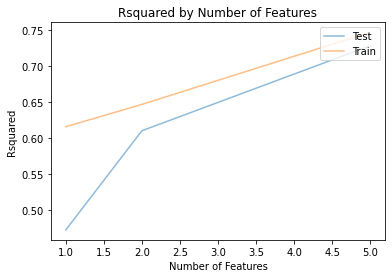

[0.4721753984716849, 0.4721753984716849, 0.4721753984716849, 0.6098080796737866, 0.7277635120396052, 0.7277635120396052, 0.7277635120396052, 0.7277635120396052, 0.7277635120396052, 0.7277635120396052] [0.6153966063077794, 0.6153966063077794, 0.6153966063077794, 0.6463441282507583, 0.7465176531369253, 0.7465176531369253, 0.7465176531369253, 0.7465176531369253, 0.7465176531369253, 0.7465176531369253] LinearRegression(normalize=True)      Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
108                  9.403371  0.852532                 56.506012  0.759330   
90                   8.350645  0.728601                 57.203987  0.794797   
104                  9.417931  0.671070                 68.708138  0.781994   
16                  10.732819  0.898874                 72.202019  0.867371   
111                  7.468545  0.712944                 53.889454  0.665564   
..                        ...       ...                       ...       ...   
71          

In [28]:
y=df_2020['Happiness Score']
X=df_2020[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Generosity',
           'Trust (Government Corruption)']]
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)
print(r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test)

**Conclusion** - Linear Regression has low mean squared error for both train(76%) and test(59%) still the performance can be improved with the usage of other Algorithms

Here Categorical Variable in this Dataset is Region. If we try to split this the Accuracy can be improved

In [9]:
r2_scores_test

[0.4721753984716849,
 0.4721753984716849,
 0.4721753984716849,
 0.6098080796737866,
 0.7277635120396058,
 0.7277635120396058,
 0.7277635120396058,
 0.7277635120396058,
 0.7277635120396058,
 0.7277635120396058]

**Categorical Variables**

In [29]:
cat_df = df_2020.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns
cat_df = cat_df[['Regional indicator']]
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

df_new=create_dummy_df(df_2020,cat_cols_lst,False)

In [30]:
df_new.columns

Index(['Country', 'Happiness Score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Happiness Rank', 'Year',
       'Regional indicator_Commonwealth of Independent States',
       'Regional indicator_East Asia',
       'Regional indicator_Latin America and Caribbean',
       'Regional indicator_Middle East and North Africa',
       'Regional indicator_North America and ANZ',
       'Regional indicator_South Asia', 'Regional indicator_Southeast Asia',
       'Regional indicator_Sub-Saharan Africa',
       'Regional ind

In [44]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

#     # Mean function
#     fill_mean = lambda col: col.fillna(col.mean())
#     # Fill the mean
#     df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop([response_col,'Country'], axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'Happiness Score', cat_cols_lst, dummy_na=False)

In [45]:
#Print training and testing score
print(" The rsquared on the test data was {}.".format(test_score))

 The rsquared on the test data was 0.9999999999999999.
